# Training notebook


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import linregress, t
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import numpy as np



filepath = "final_dataset.csv"

final_dataset = pd.read_csv(filepath)

# Prepare X and Y dataset including test/split

In [3]:
X = final_dataset[final_dataset.columns[1:]]
y = final_dataset[final_dataset.columns[0]]

In [46]:
min_mse = 10
max_r2 = 0.85
index = -1
for i in range(0,100):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)


    # Create a Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=i)
    # Train the regressor
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print("Mean Squared Error: ", mse)
    print("R-squared Score: ", r2)
    if mse < min_mse and r2 > max_r2:
        min_mse = mse
        max_r2 = r2
        index = i


Mean Squared Error:  0.5843558046469564
R-squared Score:  0.9925133126719533
Mean Squared Error:  0.5947326160340387
R-squared Score:  0.9923349765563722
Mean Squared Error:  0.6147345636712451
R-squared Score:  0.9920018645277334
Mean Squared Error:  0.5295481912525902
R-squared Score:  0.9925843104098375
Mean Squared Error:  0.6215422185559464
R-squared Score:  0.9919579344541328
Mean Squared Error:  0.7166086632717611
R-squared Score:  0.9910231871660112
Mean Squared Error:  0.62507443482343
R-squared Score:  0.9919062314588875
Mean Squared Error:  0.6439127555084141
R-squared Score:  0.9916175998586667
Mean Squared Error:  0.5160505022764859
R-squared Score:  0.9932910536349682
Mean Squared Error:  0.5843935993354844
R-squared Score:  0.9924417081131205
Mean Squared Error:  0.5837336463957632
R-squared Score:  0.9922923359482039
Mean Squared Error:  0.6414021845451376
R-squared Score:  0.9913363587057389
Mean Squared Error:  0.6294367853294287
R-squared Score:  0.9917275342837178
M

In [49]:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=index)


    # Create a Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=index)
    # Train the regressor
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print("Mean Squared Error: ", mse)
    print("R-squared Score: ", r2)

Mean Squared Error:  0.5160505022764859
R-squared Score:  0.9932910536349682


Performing Nested K-Fold Cross-Validation...

Outer Fold 1: Inner Validation MSE = 1.7344, R² = 0.9766
Outer Fold 1: Test MSE = 1.4863, R² = 0.9804

Outer Fold 2: Inner Validation MSE = 1.3794, R² = 0.9812
Outer Fold 2: Test MSE = 1.6638, R² = 0.9785

Outer Fold 3: Inner Validation MSE = 1.3540, R² = 0.9827
Outer Fold 3: Test MSE = 1.5428, R² = 0.9805

Outer Fold 4: Inner Validation MSE = 1.6082, R² = 0.9774
Outer Fold 4: Test MSE = 1.4956, R² = 0.9797


Cross-Validation Results:
Average Test MSE: 1.5471
Average Test R²: 0.9798


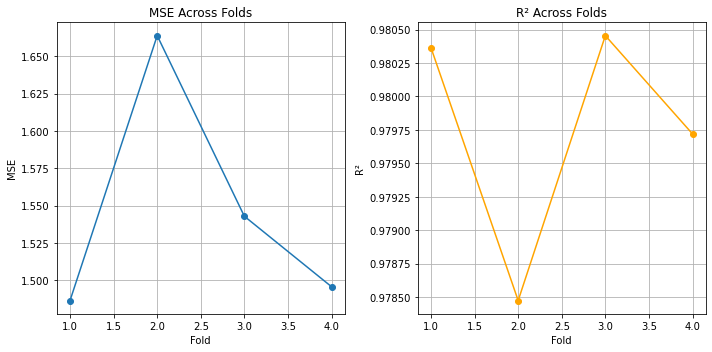

In [79]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Outer K-Fold Cross-Validation
outer_k = 4  # Number of outer folds
outer_kf = KFold(n_splits=outer_k, shuffle=True, random_state=200)

# Initialize Model
model = LinearRegression()

outer_mse_list = []
outer_r2_list = []

print("Performing Nested K-Fold Cross-Validation...\n")

# Outer Loop
for fold, (train_index, test_index) in enumerate(outer_kf.split(X), start=1):
    # Split data into outer train and test sets
    X_outer_train, X_outer_test = X.iloc[train_index], X.iloc[test_index]
    y_outer_train, y_outer_test = y.iloc[train_index], y.iloc[test_index]
    
    # Inner Split: Train-Validation within the outer train set
    X_inner_train, X_inner_val, y_inner_train, y_inner_val = train_test_split(
        X_outer_train, y_outer_train, test_size=0.2, random_state=None
    )
    
    # Train the model on the inner train set
    model.fit(X_inner_train, y_inner_train)
    
    # Validate on the inner validation set
    y_inner_val_pred = model.predict(X_inner_val)
    inner_mse = mean_squared_error(y_inner_val, y_inner_val_pred)
    inner_r2 = r2_score(y_inner_val, y_inner_val_pred)
    
    print(f"Outer Fold {fold}: Inner Validation MSE = {inner_mse:.4f}, R² = {inner_r2:.4f}")
    
    # Evaluate on the outer test set
    y_outer_test_pred = model.predict(X_outer_test)
    outer_mse = mean_squared_error(y_outer_test, y_outer_test_pred)
    outer_r2 = r2_score(y_outer_test, y_outer_test_pred)
    
    outer_mse_list.append(outer_mse)
    outer_r2_list.append(outer_r2)
    
    print(f"Outer Fold {fold}: Test MSE = {outer_mse:.4f}, R² = {outer_r2:.4f}\n")

# Print average results
print("\nCross-Validation Results:")
print(f"Average Test MSE: {np.mean(outer_mse_list):.4f}")
print(f"Average Test R²: {np.mean(outer_r2_list):.4f}")

# Plot metrics across folds
plt.figure(figsize=(10, 5))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, outer_k + 1), outer_mse_list, marker='o', label='MSE')
plt.title('MSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid()

# R² plot
plt.subplot(1, 2, 2)
plt.plot(range(1, outer_k + 1), outer_r2_list, marker='o', color='orange', label='R²')
plt.title('R² Across Folds')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.grid()

plt.tight_layout()
plt.show()